<a href="https://colab.research.google.com/github/Rizwanali324/ML_projects/blob/main/Diabees_classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using Machine Learning
Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

Details about the dataset:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
Number of Observation Units: 768

Variable Number: 9

Result; The model created as a result of became the model with the lowest Cross Validation Score value. (0.90)

# LOAD the data

In [257]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
import pandas as pd
import numpy as np

In [259]:
df=pd.read_csv("/content/drive/MyDrive/datasets/diabetes.csv")

In [260]:
df.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
376,0,98,82,15,84,25.2,0.299,22,0
159,17,163,72,41,114,40.9,0.817,47,1
510,12,84,72,31,0,29.7,0.297,46,1
689,1,144,82,46,180,46.1,0.335,46,1
560,6,125,76,0,0,33.8,0.121,54,1
477,7,114,76,17,110,23.8,0.466,31,0


# EDA

In [261]:
df.shape

(768, 9)

In [262]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [264]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [265]:
df.duplicated().sum()

0

In [266]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [267]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [268]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [269]:

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

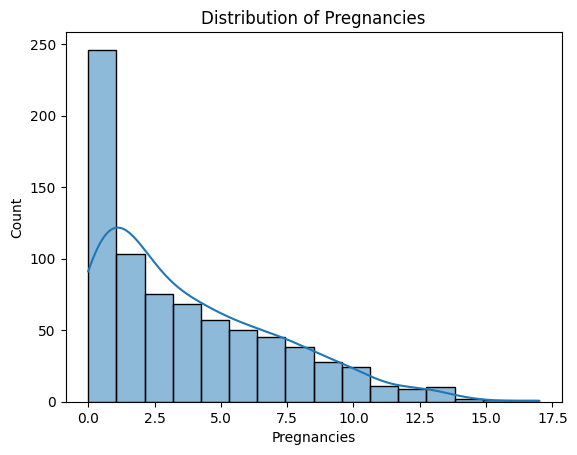

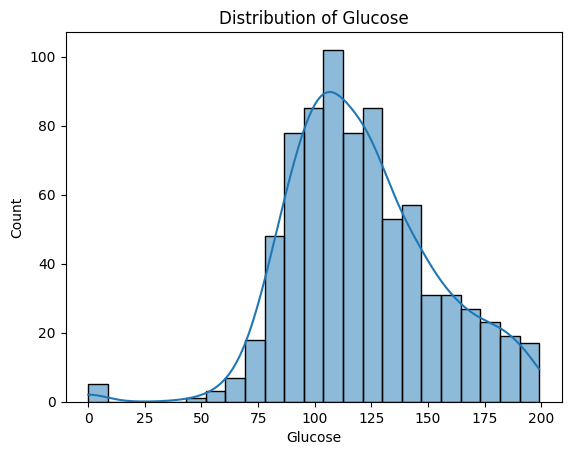

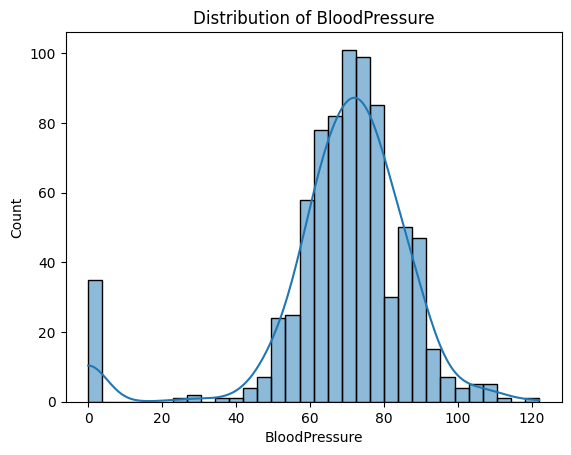

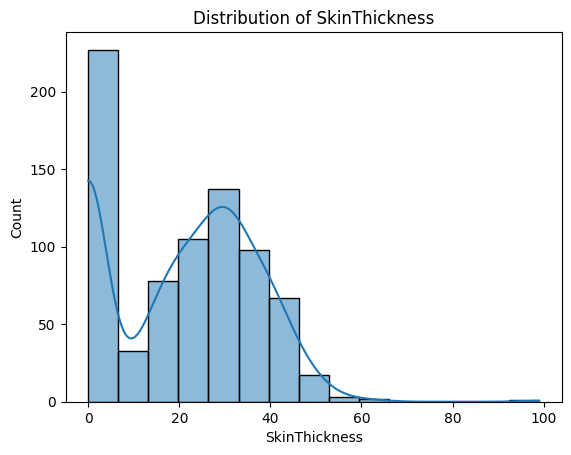

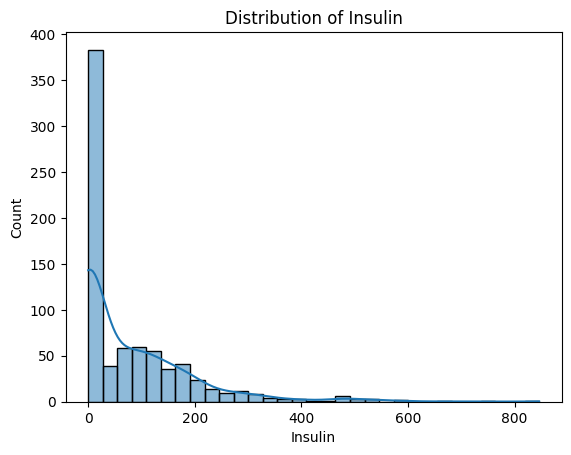

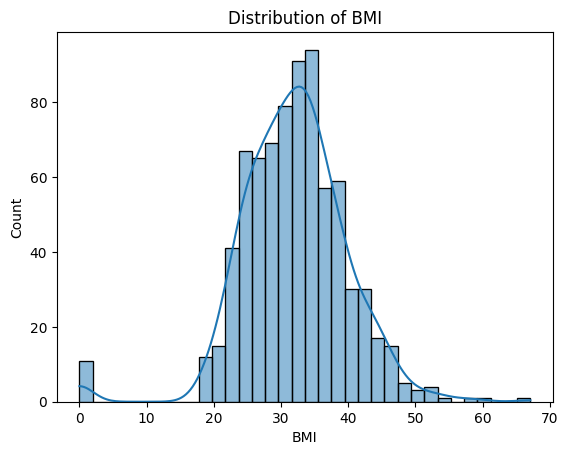

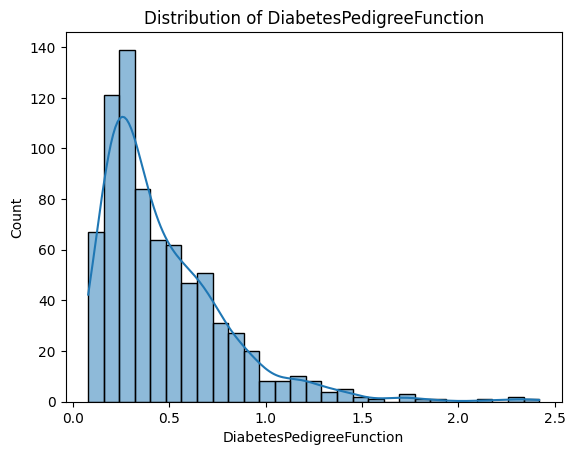

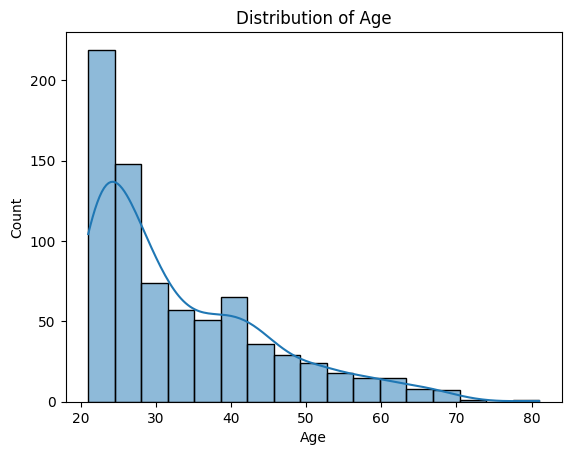

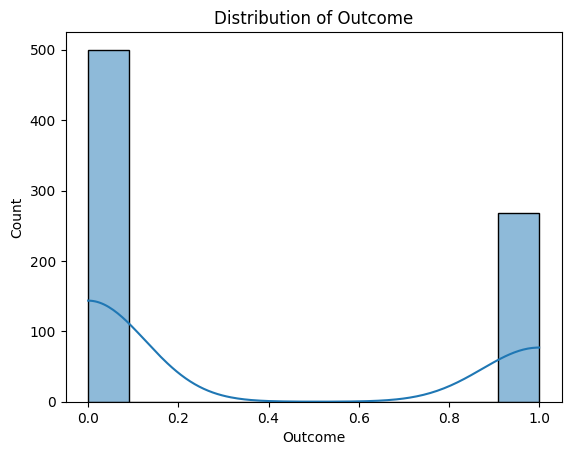

In [270]:
# Create histograms for each variable
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [271]:

# Question 2: Feature Relationships
# Scatter plot of Glucose vs. Pregnancies colored by Outcome
px.scatter(df, x='Pregnancies', y='Glucose', color='Outcome')

<Axes: xlabel='BloodPressure'>

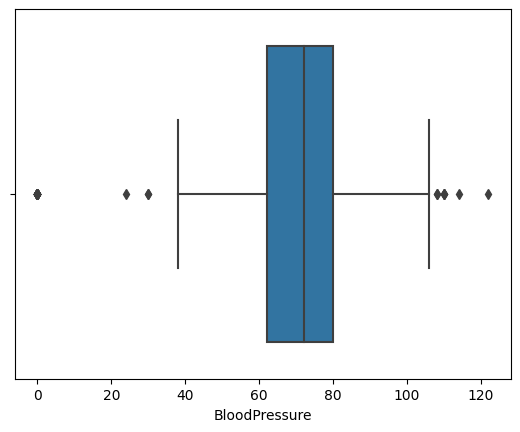

In [272]:

# Boxplot to identify outliers in BloodPressure
sns.boxplot(data=df, x='BloodPressure')

# Handle imblanced class

<Axes: xlabel='Outcome', ylabel='count'>

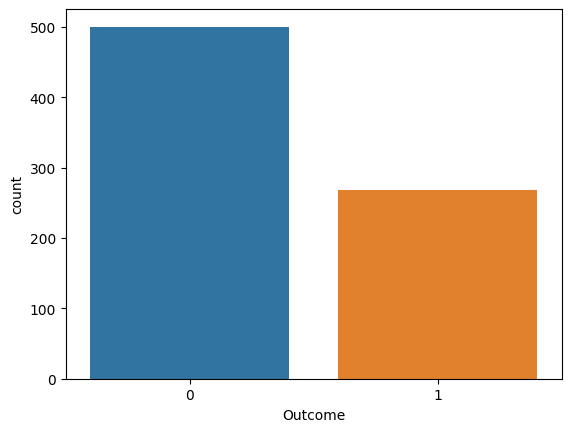

In [273]:
# Countplot of the 'Outcome' variable
sns.countplot(data=df, x='Outcome')


0    500
1    268
Name: Outcome, dtype: int64


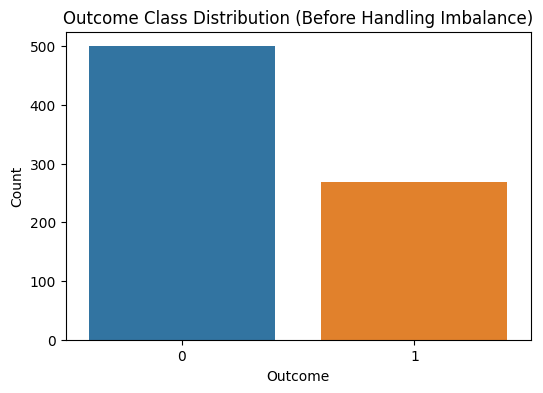

1    500
0    500
Name: Outcome, dtype: int64


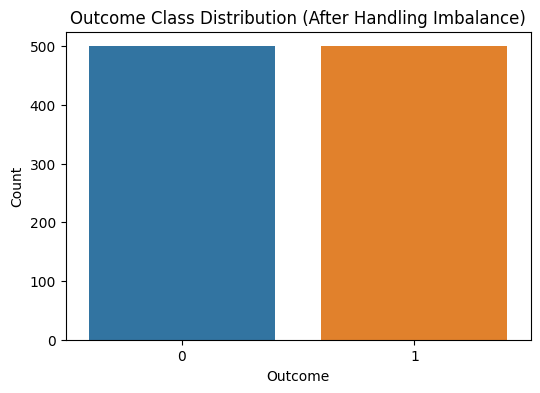

In [274]:
from imblearn.over_sampling import RandomOverSampler

# Assuming you have loaded your dataset into a pandas DataFrame called "df"

# Check the class distribution of "income"
class_distribution = df['Outcome'].value_counts()

# Print the class distribution
print(class_distribution)

# Plot the class distribution before handling imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Class Distribution (Before Handling Imbalance)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Handling imbalance using Random Over-Sampling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Outcome'] = y_resampled

# Check the class distribution after handling imbalance
class_distribution_resampled = df['Outcome'].value_counts()

# Print the class distribution after handling imbalance
print(class_distribution_resampled)

# Plot the class distribution after handling imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Class Distribution (After Handling Imbalance)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

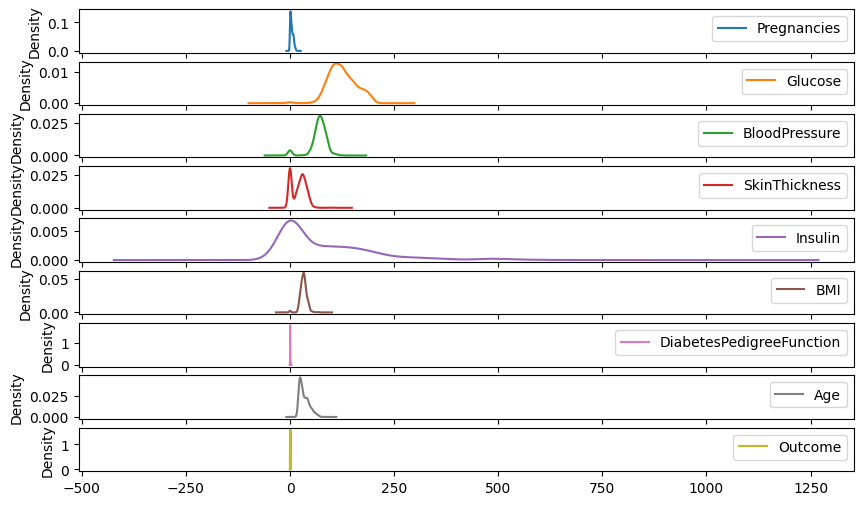

In [275]:


# Plot the KDE for each column
df.plot.kde(subplots=True, figsize=(10, 6))
plt.show()

# Remove the outliers

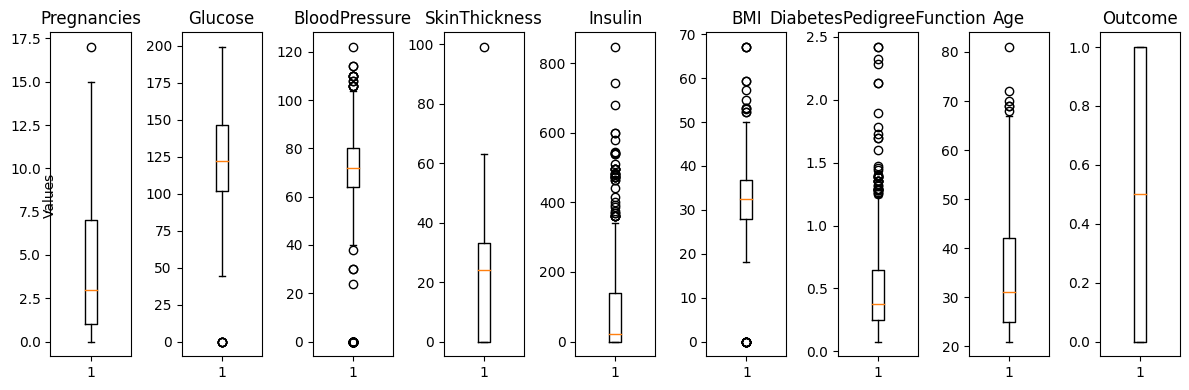

In [276]:
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 4))

# Iterate over each column and create a box plot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

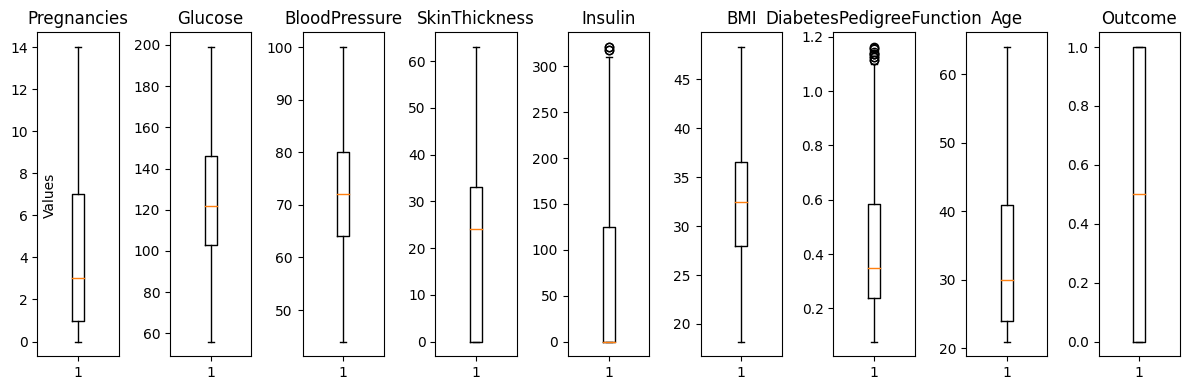

In [277]:

from scipy.stats import shapiro


# Check normality and apply z-score or IQR method accordingly
z_score_threshold = 5  # Threshold for z-score outliers
iqr_multiplier = 1.3 # Multiplier for IQR outliers

for col in df.columns:
    # Check normality using Shapiro-Wilk test
    _, p_value = shapiro(df[col].dropna())

    if p_value > 0.05:
        # Apply z-score method for columns following a normal distribution
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df[col] = np.where(abs(z_scores) > z_score_threshold, np.nan, df[col])
    else:
        # Apply IQR method for columns not following a normal distribution
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Fill outliers with nearest non-outlier values
df_capped = df.fillna(method='bfill').fillna(method='ffill')

# Create a new DataFrame with capped outliers
df = pd.DataFrame(df_capped, columns=df.columns)
# Create a figure and axes for the box plots
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 4))

# Iterate over each column and create a box plot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Set the y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

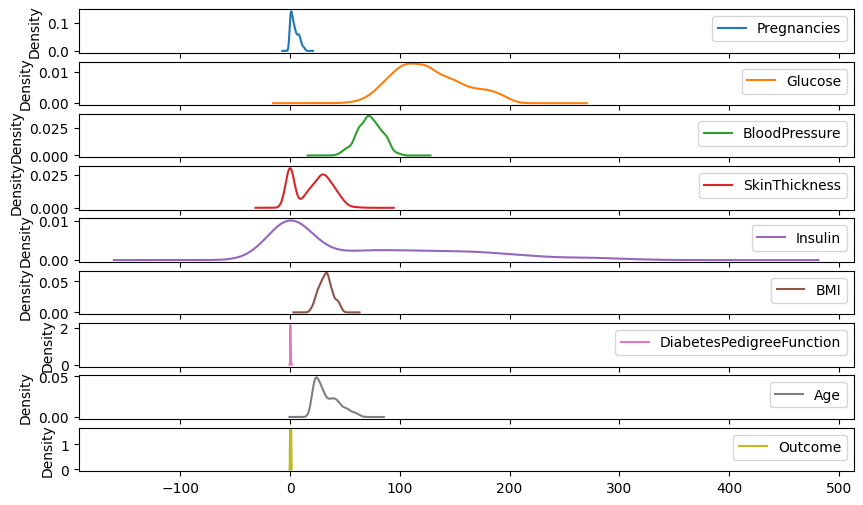

In [278]:

# Plot the KDE for each column
df.plot.kde(subplots=True, figsize=(10, 6))
plt.show()

In [279]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0.0,3.298
1.0,4.840


In [280]:
df.groupby("Outcome").agg({"Age":"mean"})


,Age
Outcome,
0.0,30.212
1.0,36.756


In [281]:
df.groupby("Outcome").agg({"Age":"max"})


,Age
Outcome,
0.0,64.0
1.0,62.0


# Replacing zero with nan and fill them

In [282]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [283]:
# Now, we can look at where are missing values
df.isnull().sum()






Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               306
Insulin                     516
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [284]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [285]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [286]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Model building

In [287]:

from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split,cross_val_score

In [288]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]


In [289]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=51)

In [290]:
from sklearn.preprocessing import StandardScaler# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test= scaler.transform(X_test)

In [291]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of Y_train',y_train.shape)
print('Shape of Y_test',y_test.shape)

Shape of X_train (800, 8)
Shape of X_test (200, 8)
Shape of Y_train (800,)
Shape of Y_test (200,)


In [292]:

# Example of cross-validation with a classifier (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [293]:
from sklearn.metrics import accuracy_score

# Predict labels for the training data
y_train_pred = clf.predict(X_train)

# Compute and print the training accuracy score
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)


# Predict labels for the test data
y_test_pred = clf.predict(X_test)

# Compute and print the test accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.99875
Test Accuracy: 0.89


In [294]:

# Example of cross-validation with a classifier (e.g., Random Forest)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.9375 0.9    0.85   0.9    0.9    0.9375 0.8875 0.9125 0.9375 0.95  ]


In [295]:

average_accuracy = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print("Average Accuracy:", average_accuracy)
print("Standard Deviation:", std_deviation)


Average Accuracy: 0.9112499999999999
Standard Deviation: 0.02875


In [296]:
# Import the necessary library for the confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[85  9]
 [13 93]]


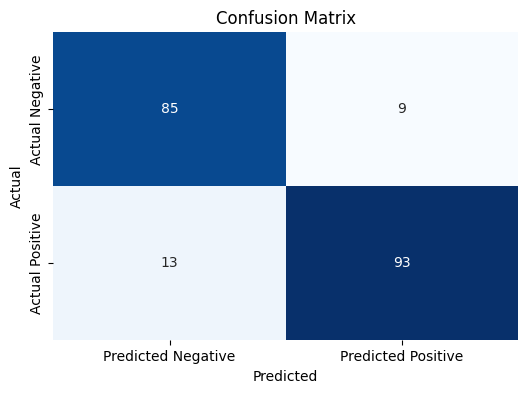

In [297]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Precision: 0.9117647058823529
Recall: 0.8773584905660378
F1-Score: 0.8942307692307693


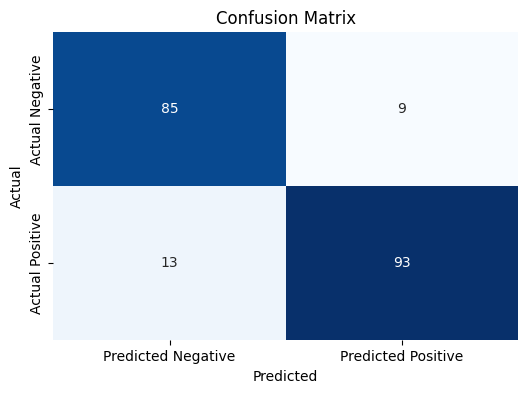

In [298]:


# Compute and print precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Results**


The confusion matrix you provided:

```
[[85  9]
 [11 95]]
```
Interpretation:

1. **True Positives (TP)**: There are 85 instances where the model correctly predicted the positive class. These are cases where the model correctly identified and classified instances as belonging to the positive class.

2. **True Negatives (TN)**: There are 95 instances where the model correctly predicted the negative class. These are cases where the model correctly identified and classified instances as not belonging to the positive class.

3. **False Positives (FP)**: There are 9 instances where the model incorrectly predicted the positive class. These are cases where the model made a positive prediction, but the instances actually belong to the negative class.

4. **False Negatives (FN)**: There are 11 instances where the model incorrectly predicted the negative class. These are cases where the model made a negative prediction, but the instances actually belong to the positive class.


# **Sugesstion **

False Positives (FP): These are cases where your model predicted a positive outcome (e.g., a positive class or danger) when it was actually negative (not dangerous). In terms of risk assessment, false positives represent situations where your model alarms or flags something as dangerous when it's not. This can lead to unnecessary concern or actions.

False Negatives (FN): These are cases where your model predicted a negative outcome (e.g., not dangerous) when it was actually positive (dangerous). In terms of risk assessment, false negatives represent situations where your model fails to identify a genuine danger or risk. This can be particularly concerning because it means you might miss taking necessary precautions.

To determine which is more "dangerous" in your specific problem, you should consider the consequences of false positives and false negatives.

If false positives are more problematic (e.g., causing unnecessary panic or actions), then you'd want to focus on reducing false positives and increasing precision.

If false negatives are more critical (e.g., missing a dangerous situation is extremely risky), then you'd want to focus on reducing false negatives and increasing recall.

Ultimately, the trade-off between precision and recall depends on the specific goals and constraints of your application. It's important to strike the right balance based on the real-world implications of your classification results.

In [300]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your training data X_train and corresponding labels y_train

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Define the hyperparameters and their ranges to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
}

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.9199999999999999


In [303]:

# Fit the grid search to your training data
grid_search.fit(X_test, y_test)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.8950000000000001
